In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd

[ 0.08068199 17.51345122]


<Figure size 1000x300 with 0 Axes>

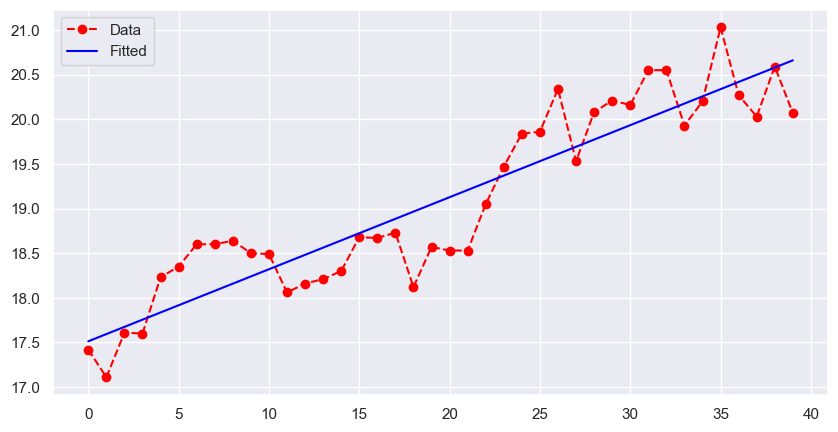

In [2]:
# Linear Function Fitting
# Load linear data
plt.figure(figsize=(10, 3))
# linear_data = pd.read_csv('oil.csv', na_values=['.'])[810:810 + len(t)]
# y = linear_data['DCOILWTICO'].bfill().values
# make y in float type
from sktime.datasets import load_oil_display
y = load_oil_display()
t = np.arange(40)
y = y.astype(float)
coefficients = np.polyfit(t, y, 1)
print(coefficients)

predicted = np.polyval(coefficients, t)

sns.set()
plt.figure(figsize=(10, 5))
plt.plot(t, y, color='red', label='Data', linestyle='--', marker='o')
plt.plot(t, predicted, color='blue', label='Fitted')
plt.legend()

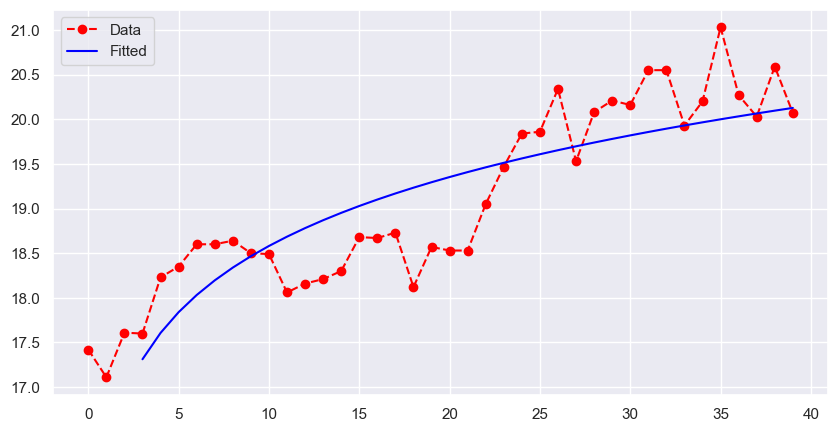

In [5]:
# Power function data
a = 3.0
b = 1.5
# y = a * t ** b + np.random.normal(0, 5, 20)

# Fit (Fit the log of the data from point 3 to avoid invalid log values)
log_t = np.log(t[3:])
log_y = np.log(y[3:])
coefficients = np.polyfit(log_t, log_y, 1)
predicted = np.e ** np.polyval(coefficients, log_t)

sns.set()
plt.figure(figsize=(10, 5))
plt.plot(t, y, color='red', label='Data', linestyle='--', marker='o')
plt.plot(t[3:], predicted, color='blue', label='Fitted')
plt.legend()

[ 1.32302526e-06 -1.36322581e-04  4.15079219e-03 -4.13893666e-02
  5.14208762e-01  2.72581743e+01]


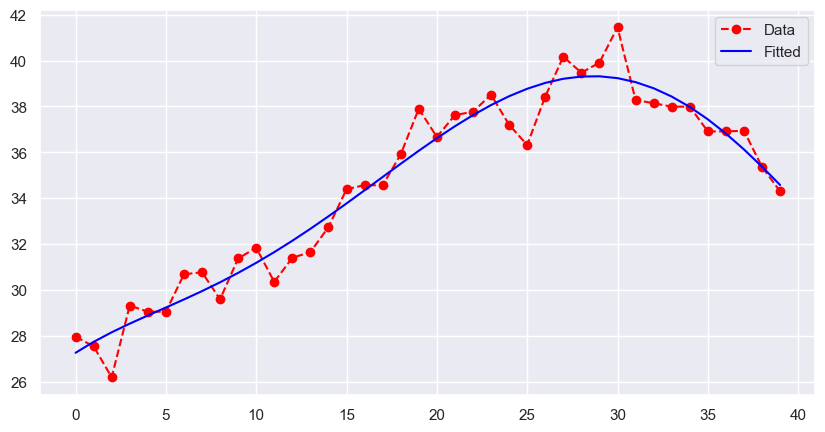

In [ ]:
# Polynomial function data
# y = 2 * t ** 2 + 1 + np.random.normal(0, 50, 20)
coefficients = np.polyfit(t, y, 5)
print(coefficients)

predicted = np.polyval(coefficients, t)

sns.set()
plt.figure(figsize=(10, 5))
plt.plot(t, y, color='red', label='Data', linestyle='--', marker='o')
plt.plot(t, predicted, color='blue', label='Fitted')
plt.legend()

[1.49996321 0.50000062]


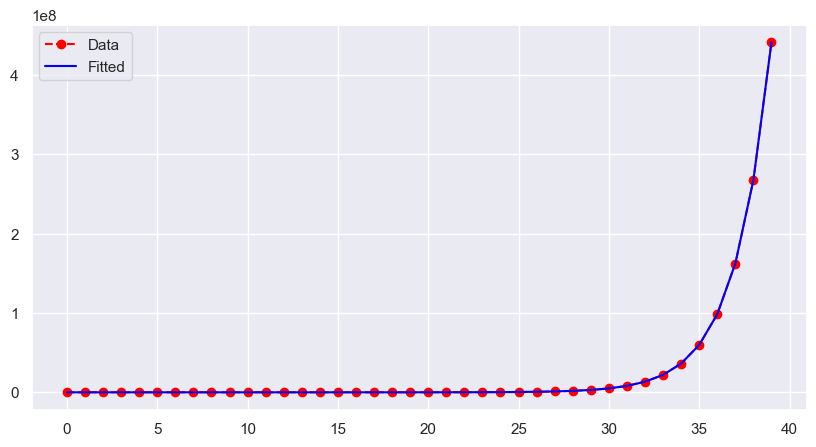

In [6]:
# Exponential function data
def exp_func(t, a, b):
    return a * np.e ** (b * t)

y = np.array([exp_func(i, 1.5, 0.5) for i in t]) + np.random.normal(0, 1000, len(t))
params, _ = curve_fit(exp_func, t, y)
print(params)
predicted = exp_func(t, *params)

sns.set()
plt.figure(figsize=(10, 5))
plt.plot(t, y, color='red', label='Data', linestyle='--', marker='o')
plt.plot(t, predicted, color='blue', label='Fitted')
plt.legend()

[10.04425717  1.92763534  4.93310129]


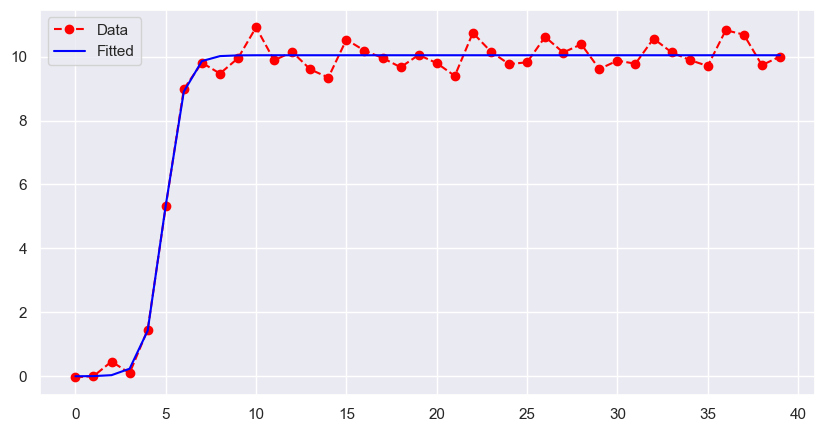

In [7]:
# Sigmoid function data
def sigmoid_func(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

y = np.array([sigmoid_func(i, 10, 2, 5) for i in t]) + np.random.normal(0, 0.5, len(t))
params, _ = curve_fit(sigmoid_func, t, y, p0=[max(y), 1, np.median(t)])
print(params)
predicted = sigmoid_func(t, *params)

sns.set()
plt.figure(figsize=(10, 5))
plt.plot(t, y, color='red', label='Data', linestyle='--', marker='o')
plt.plot(t, predicted, color='blue', label='Fitted')
plt.legend()